# Credit card Risk Detection


## Downloading the dataset

In [ ]:
import pandas as pd 
import numpy as np

credit_df =pd.read_csv('german_credit_data.csv')

In [ ]:
credit_df.head(5)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit_df.drop(columns = ['Unnamed: 0'],inplace=True)

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               522 non-null    int64 
 1   Sex               522 non-null    object
 2   Job               522 non-null    int64 
 3   Housing           522 non-null    object
 4   Saving accounts   522 non-null    object
 5   Checking account  522 non-null    object
 6   Credit amount     522 non-null    int64 
 7   Duration          522 non-null    int64 
 8   Purpose           522 non-null    object
 9   Risk              522 non-null    object
dtypes: int64(4), object(6)
memory usage: 44.9+ KB


We can see that there are some missing values in the dataset

In [ ]:
credit_df.describe()

,Age,Job,Credit amount,Duration
count,522.000000,522.000000,522.000000,522.000000
mean,34.888889,1.875479,3278.745211,21.339080
std,11.787918,0.682811,2929.155177,12.474079
min,19.000000,0.000000,276.000000,6.000000
25%,26.000000,2.000000,1297.500000,12.000000
50%,31.500000,2.000000,2326.500000,18.000000
75%,41.000000,2.000000,3971.250000,26.750000
max,75.000000,3.000000,18424.000000,72.000000


## EDA

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
credit_df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

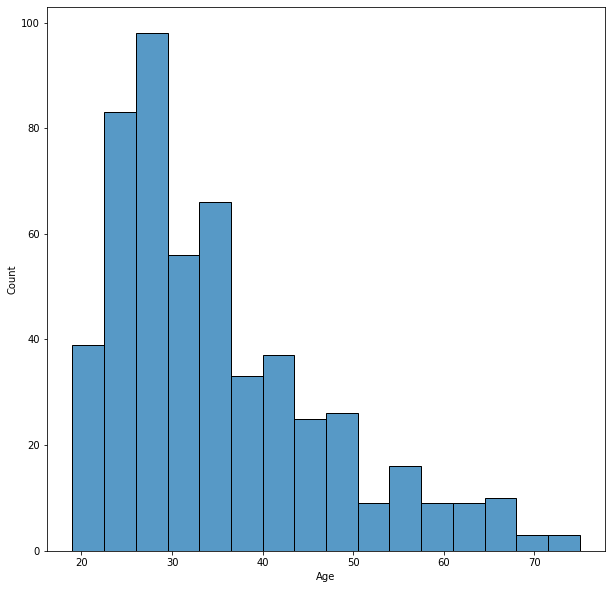

In [ ]:
sns.histplot(credit_df,x='Age')

It seems like more number of customers belong to the age group 20-30

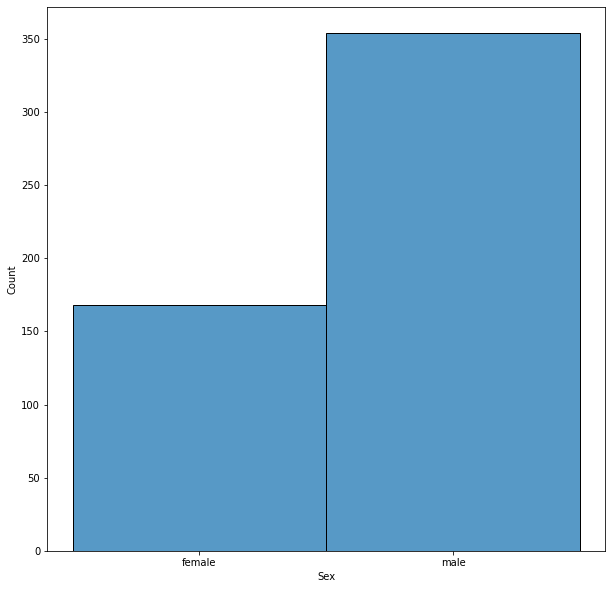

In [ ]:
sns.histplot(credit_df,x='Sex')

Male customers are more than the female customers

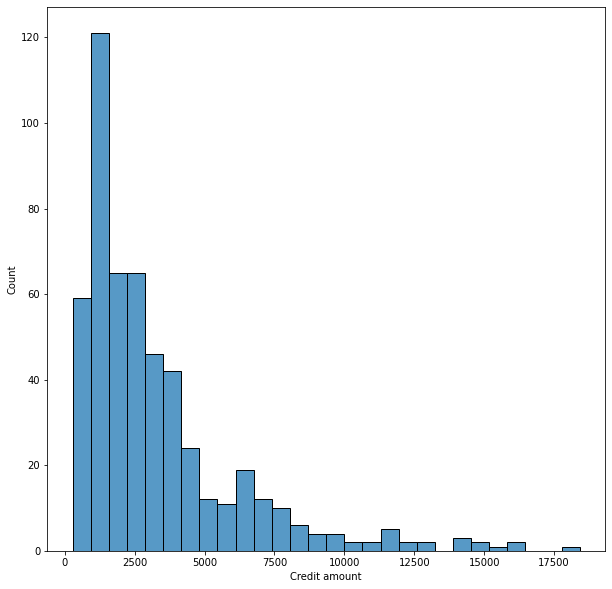

In [ ]:
sns.histplot(credit_df,x='Credit amount')

More number of credit amounts are in the range 1000-2500

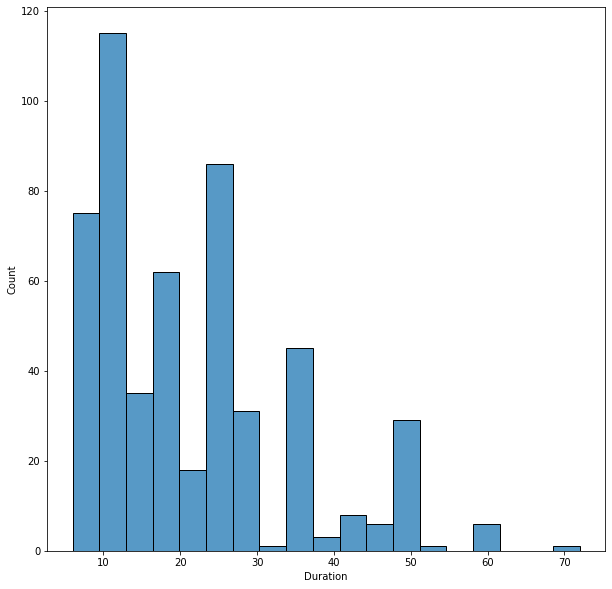

In [ ]:
sns.histplot(credit_df,x='Duration')

More number of credit were in duraiton for 1-2 years

In [ ]:
n = credit_df.select_dtypes(np.number).columns.tolist()
n

['Age', 'Job', 'Credit amount', 'Duration']

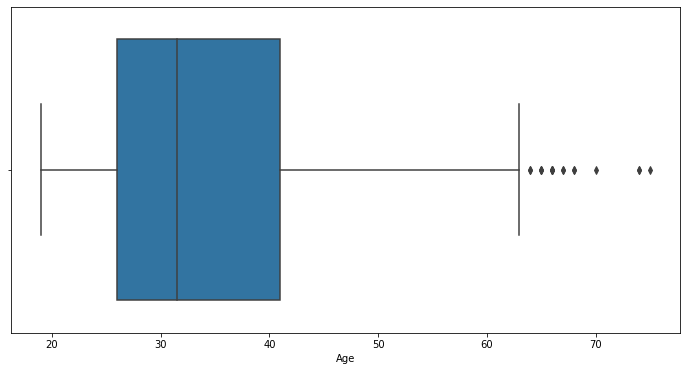

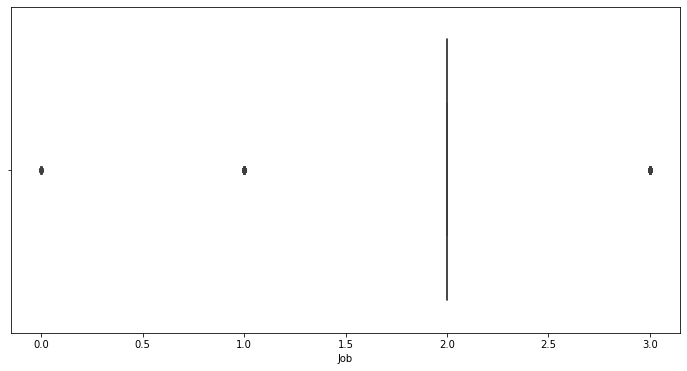

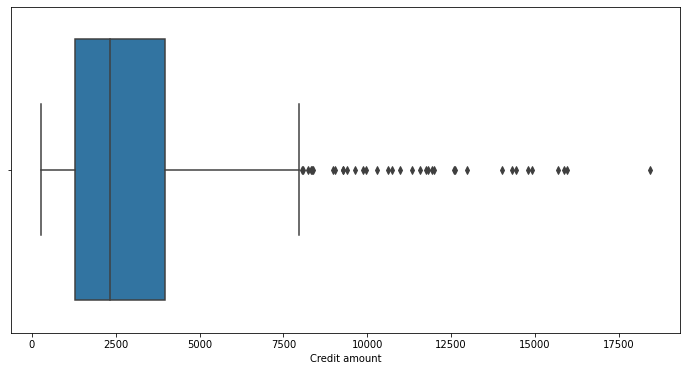

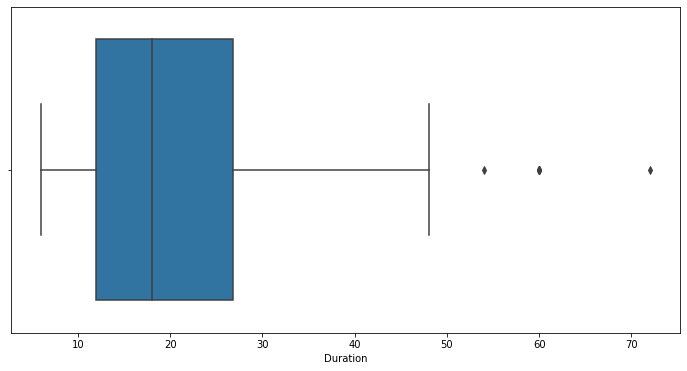

In [ ]:
for i in n:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    #plt.xlim(-10,10)
    sns.boxplot(x=i,data=credit_df,ax=ax)

There are some outliers present in this dataset. So let's remove them

In [ ]:
def outliers(df,fn):
  q1 = df[fn].quantile(0.25)
  q3 = df[fn].quantile(0.75)
  IQR = q3-q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR
  ls = df.index[ (df[fn]<lower_bound) | (df[fn]>upper_bound)]
  return ls

In [ ]:
index_list = []
for i in n:
  index_list.extend(outliers(credit_df,i))

Now let's drop the outliers from the dataset

In [ ]:
def remove(df,ls):
  ls = sorted(set(index_list))
  df = df.drop(ls)
  return df

In [ ]:
credit_df = remove(credit_df,index_list)

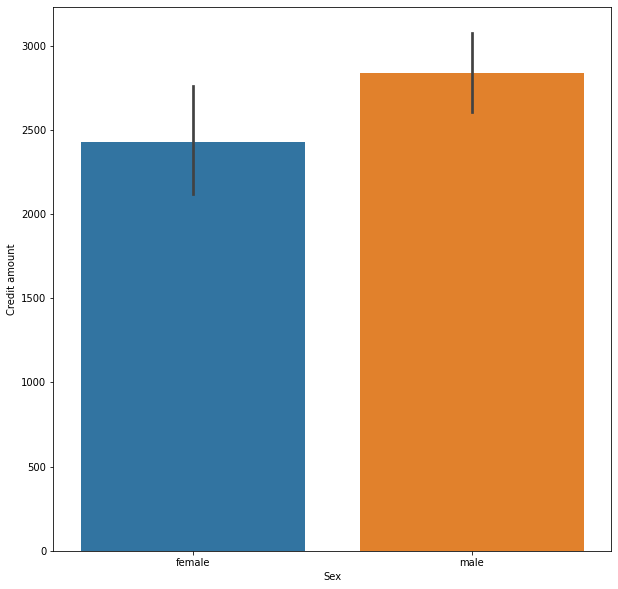

In [ ]:
sns.barplot(data=credit_df,x='Sex',y='Credit amount')

Seems like there are more credit amount given for men than women

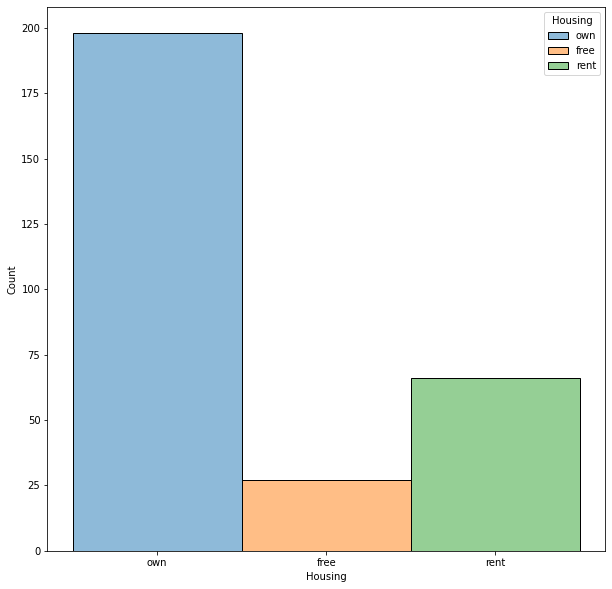

In [ ]:
sns.histplot(credit_df,x='Housing',hue='Housing')

We can see that people who own a house had applied for credit from bank

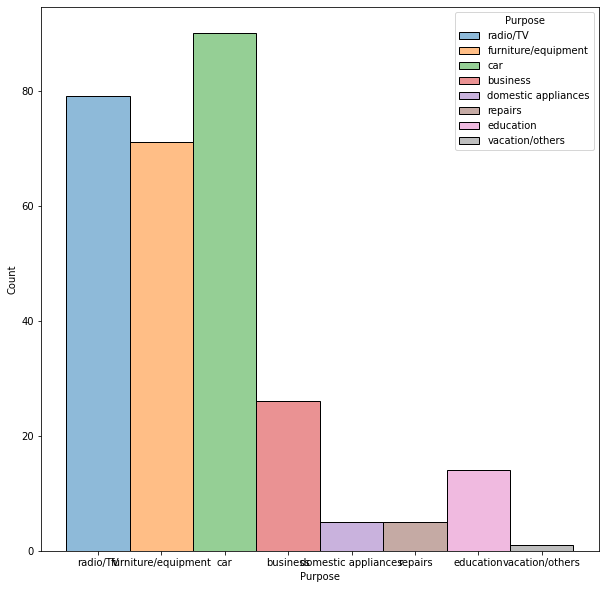

In [ ]:
matplotlib.rcParams['figure.figsize'] = 10,10
sns.histplot(credit_df,x='Purpose',hue='Purpose')

We can see that more number of loan is applied for TV/radio purpose

In [ ]:
credit_df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

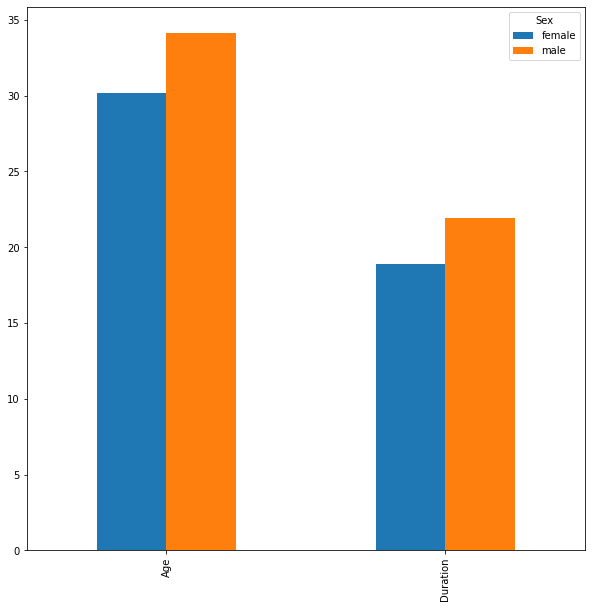

In [ ]:
credit_df.groupby('Sex').mean()[['Age','Duration']].T.plot(kind='bar')

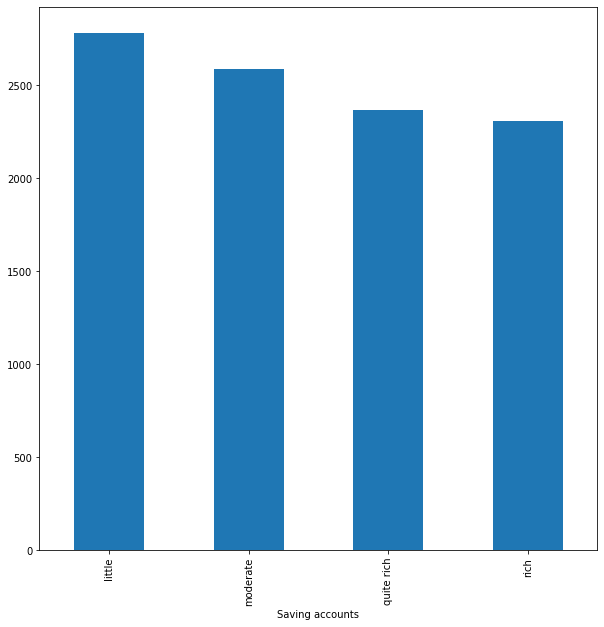

In [ ]:
credit_df.groupby('Saving accounts').mean()['Credit amount'].T.plot(kind='bar')

There are more credit account for little saving accounts

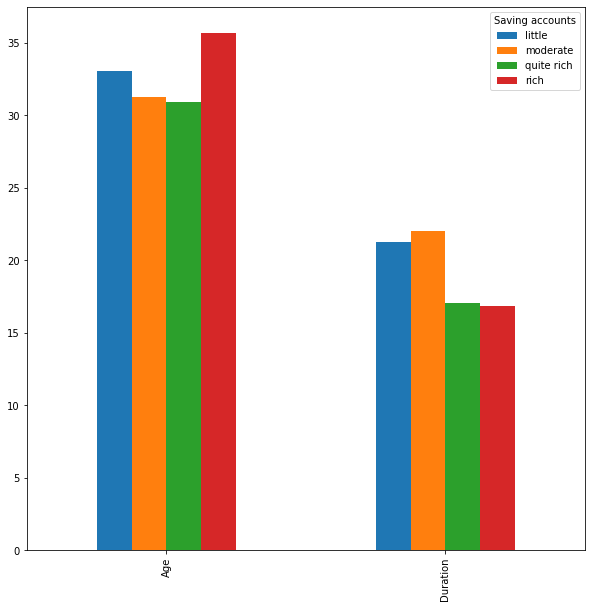

In [ ]:
credit_df.groupby('Saving accounts').mean()[['Age','Duration']].T.plot(kind='bar')

## Splitting the data for training,validation and testing 


In [ ]:
from sklearn.model_selection import train_test_split
train_val_df , test_df = train_test_split(credit_df,test_size=0.2,random_state=42)
train_df , val_df = train_test_split(credit_df,test_size=0.25,random_state=42)

In [ ]:
train_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
203,21,male,2,rent,little,little,902,12,education,bad
687,30,male,2,free,moderate,moderate,2862,36,car,good
114,35,male,2,own,quite rich,little,1680,12,radio/TV,good
39,24,male,2,own,little,moderate,458,9,radio/TV,good
986,33,male,2,own,little,rich,6289,42,business,good


In [ ]:
val_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
284,37,male,2,own,moderate,moderate,3878,24,car,good
866,27,female,2,own,little,little,2389,18,radio/TV,good
143,22,male,2,own,little,little,2462,18,furniture/equipment,bad
578,27,male,2,own,little,moderate,2820,36,car,bad
482,57,female,2,rent,rich,little,3622,30,furniture/equipment,good


In [ ]:
test_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
284,37,male,2,own,moderate,moderate,3878,24,car,good
866,27,female,2,own,little,little,2389,18,radio/TV,good
143,22,male,2,own,little,little,2462,18,furniture/equipment,bad
578,27,male,2,own,little,moderate,2820,36,car,bad
482,57,female,2,rent,rich,little,3622,30,furniture/equipment,good


## Identifying input and target column

In [ ]:
credit_df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
input_col = ['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']
target_col = 'Risk'

In [ ]:
train_input = train_df[input_col].copy()
train_target = train_df[target_col].copy()

In [ ]:
val_input = val_df[input_col].copy()
val_target = val_df[target_col].copy()

In [ ]:
test_input = test_df[input_col].copy()
test_target = test_df[target_col].copy()

Now let's select the numeric and categorical columns

In [ ]:
numeric_col = train_input.select_dtypes(np.number).columns.tolist()
cate_col = train_input.select_dtypes('object').columns.tolist()
print(numeric_col)
print(cate_col)

['Age', 'Job', 'Credit amount', 'Duration']
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [ ]:
train_input[numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 203 to 342
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            218 non-null    int64
 1   Job            218 non-null    int64
 2   Credit amount  218 non-null    int64
 3   Duration       218 non-null    int64
dtypes: int64(4)
memory usage: 8.5 KB


In [ ]:
train_input[numeric_col].describe()

,Age,Job,Credit amount,Duration
count,218.000000,218.0,218.000000,218.000000
mean,33.220183,2.0,2715.761468,20.321101
std,10.244349,0.0,1714.106568,11.566184
min,20.000000,2.0,338.000000,6.000000
25%,25.000000,2.0,1328.000000,12.000000
50%,30.000000,2.0,2321.000000,18.000000
75%,37.750000,2.0,3647.000000,24.000000
max,63.000000,2.0,7882.000000,48.000000


## Imputing missing values

In [ ]:
train_input[numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 577 to 185
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            418 non-null    int64
 1   Job            418 non-null    int64
 2   Credit amount  418 non-null    int64
 3   Duration       418 non-null    int64
dtypes: int64(4)
memory usage: 16.3 KB


In [ ]:
val_input[numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 281 to 690
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            140 non-null    int64
 1   Job            140 non-null    int64
 2   Credit amount  140 non-null    int64
 3   Duration       140 non-null    int64
dtypes: int64(4)
memory usage: 5.5 KB


In [ ]:
test_input[numeric_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 281 to 655
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            112 non-null    int64
 1   Job            112 non-null    int64
 2   Credit amount  112 non-null    int64
 3   Duration       112 non-null    int64
dtypes: int64(4)
memory usage: 4.4 KB


It seems like there no missing values in the numeric fields for train,validation and test data sets

In [ ]:
train_input = train_input.dropna(subset=cate_col,how='any')
val_input = val_input.dropna()
test_input = test_input.dropna()

In [ ]:
print(train_input.isna().sum())
print(val_input.isna().sum())
print(test_input.isna().sum())

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


Now there are no misisng values in the sets

## Scaling numeric values

In [ ]:
train_input[numeric_col].describe()

,Age,Job,Credit amount,Duration
count,218.000000,218.0,218.000000,218.000000
mean,33.220183,2.0,2715.761468,20.321101
std,10.244349,0.0,1714.106568,11.566184
min,20.000000,2.0,338.000000,6.000000
25%,25.000000,2.0,1328.000000,12.000000
50%,30.000000,2.0,2321.000000,18.000000
75%,37.750000,2.0,3647.000000,24.000000
max,63.000000,2.0,7882.000000,48.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(credit_df[numeric_col])

In [ ]:
train_input[numeric_col] = scaler.transform(train_input[numeric_col])
val_input[numeric_col] = scaler.transform(val_input[numeric_col])
test_input[numeric_col] = scaler.transform(test_input[numeric_col])

In [ ]:
train_input[numeric_col].describe()

,Age,Job,Credit amount,Duration
count,218.000000,218.0,218.000000,218.000000
mean,0.307446,0.0,0.311715,0.340979
std,0.238241,0.0,0.224712,0.275385
min,0.000000,0.0,0.000000,0.000000
25%,0.116279,0.0,0.129785,0.142857
50%,0.232558,0.0,0.259963,0.285714
75%,0.412791,0.0,0.433797,0.428571
max,1.000000,0.0,0.988988,1.000000


## Encoding Categorical columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(credit_df[cate_col])

In [ ]:
enc_col = encoder.get_feature_names(cate_col).tolist()
enc_col

['Sex_female',
 'Sex_male',
 'Housing_free',
 'Housing_own',
 'Housing_rent',
 'Saving accounts_little',
 'Saving accounts_moderate',
 'Saving accounts_quite rich',
 'Saving accounts_rich',
 'Checking account_little',
 'Checking account_moderate',
 'Checking account_rich',
 'Purpose_business',
 'Purpose_car',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_furniture/equipment',
 'Purpose_radio/TV',
 'Purpose_repairs',
 'Purpose_vacation/others']

In [ ]:
train_input[enc_col] = encoder.transform(train_input[cate_col])
val_input[enc_col] = encoder.transform(val_input[cate_col])
test_input[enc_col] = encoder.transform(test_input[cate_col])

In [ ]:
train_input.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
203,0.023256,male,0.0,rent,little,little,0.073938,0.142857,education,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
687,0.232558,male,0.0,free,moderate,moderate,0.330886,0.714286,car,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.348837,male,0.0,own,quite rich,little,0.175931,0.142857,radio/TV,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39,0.093023,male,0.0,own,little,moderate,0.015732,0.071429,radio/TV,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
986,0.302326,male,0.0,own,little,rich,0.780152,0.857143,business,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train = train_input[numeric_col+enc_col]
x_val = val_input[numeric_col + enc_col]
x_test = test_input[numeric_col + enc_col]

## Model

Here we are going to use DecisionTree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42).fit(x_train,train_target)

In [ ]:
from sklearn.metrics import mean_squared_error,accuracy_score

In [ ]:
model.predict(x_train)

array(['bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad',
       'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'bad', 'good',
       'bad', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'bad', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad',
       

In [ ]:
accuracy_score(model.predict(x_train),train_target)

1.0

It seems like the accuracy score is 1 which is pretty good. But we cant solely rely on it. So let's check for validation  

In [ ]:
accuracy_score(model.predict(x_val),val_target)

0.6301369863013698

We can see that the score is 63% 

Now let's visualize how the model has done the prediction

## Visualization

In [ ]:
from sklearn.tree import plot_tree

[Text(1953.0, 978.48, 'Checking account_little <= 0.5\ngini = 0.493\nsamples = 218\nvalue = [96, 122]'),
 Text(1116.0, 761.0400000000001, 'Duration <= 0.964\ngini = 0.429\nsamples = 106\nvalue = [33, 73]'),
 Text(892.8, 543.6, 'Credit amount <= 0.126\ngini = 0.407\nsamples = 102\nvalue = [29, 73]'),
 Text(446.4, 326.1600000000001, 'Purpose_radio/TV <= 0.5\ngini = 0.497\nsamples = 26\nvalue = [12, 14]'),
 Text(223.2, 108.72000000000003, '\n  (...)  \n'),
 Text(669.5999999999999, 108.72000000000003, '\n  (...)  \n'),
 Text(1339.1999999999998, 326.1600000000001, 'Age <= 0.221\ngini = 0.347\nsamples = 76\nvalue = [17, 59]'),
 Text(1116.0, 108.72000000000003, '\n  (...)  \n'),
 Text(1562.3999999999999, 108.72000000000003, '\n  (...)  \n'),
 Text(1339.1999999999998, 543.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(2790.0, 761.0400000000001, 'Duration <= 0.131\ngini = 0.492\nsamples = 112\nvalue = [63, 49]'),
 Text(2008.8, 543.6, 'Age <= 0.093\ngini = 0.278\nsamples = 18\nvalue = [3, 

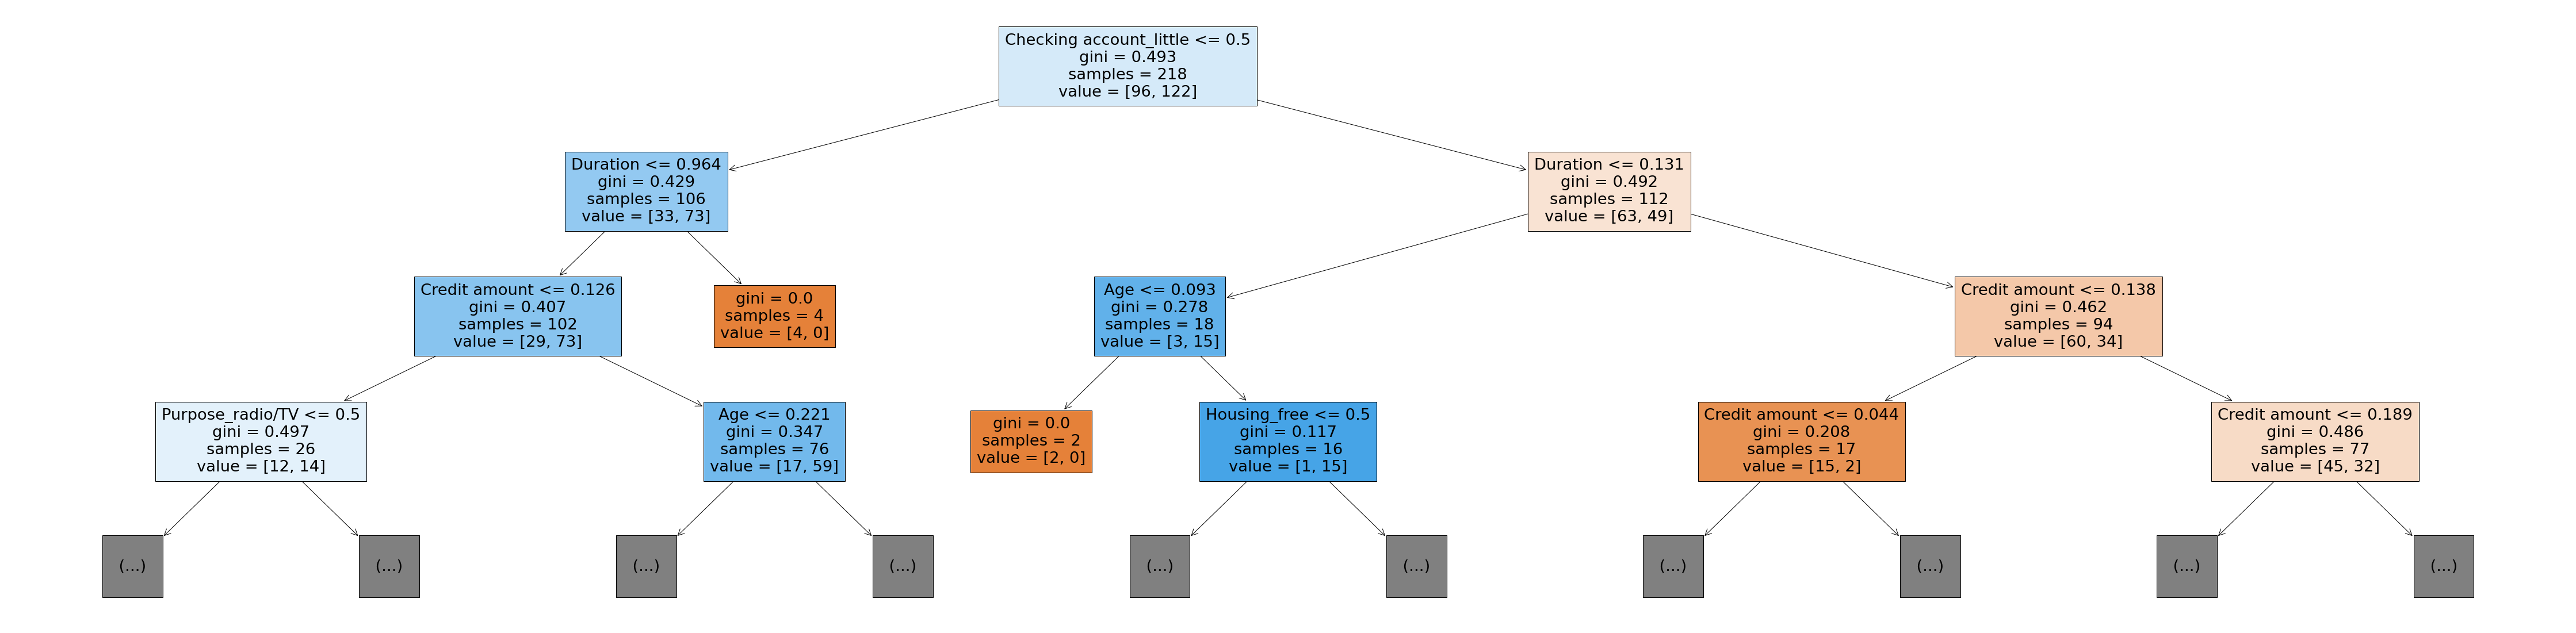

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,max_depth=3,filled=True)

So based on the gini index the model predicts the target

In [ ]:
model.tree_.max_depth

17

It seems like our model has a depth of 17

## Feature importance

In [ ]:
importance_df = pd.DataFrame({
    'Feature' : numeric_col+enc_col,
    'Importance' : model.feature_importances_
}).sort_values('Importance',ascending=False)

In [ ]:
importance_df.head(5)

,Feature,Importance
0,Age,0.340582
2,Credit amount,0.198286
3,Duration,0.187702
13,Checking account_little,0.063953
21,Purpose_radio/TV,0.056989


Let's visualize the importance as a barplot

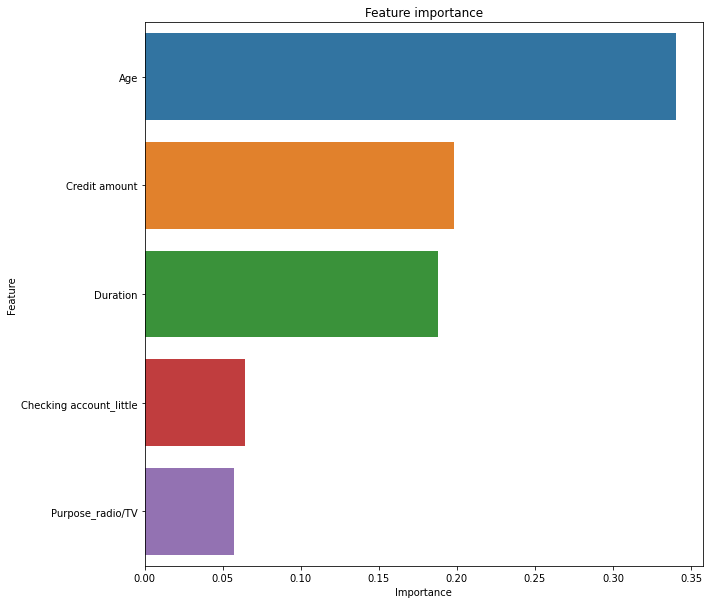

In [ ]:
plt.title('Feature importance')
sns.barplot(data=importance_df.head(5),x='Importance',y='Feature')

## Hyperparameter Tuning and Overfitting

`max_depth`

In [ ]:
model = DecisionTreeClassifier(max_depth=3,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

0.7064220183486238

It seems like the score is 70%.Let's tune it

In [ ]:
model = DecisionTreeClassifier(max_depth=5,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

0.8119266055045872

In [ ]:
model = DecisionTreeClassifier(max_depth=10,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

0.944954128440367

In [ ]:
model = DecisionTreeClassifier(max_depth=10,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

0.944954128440367

In [ ]:
model = DecisionTreeClassifier(max_depth=15,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

0.9954128440366973

In [ ]:
model = DecisionTreeClassifier(max_depth=20,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

1.0

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(x_train, train_target)
    train_acc = 1 - model.score(x_train, train_target)
    val_acc = 1 - model.score(x_val, val_target)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1,21)])
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.376147,0.438356
1,2,0.302752,0.438356
2,3,0.293578,0.438356
3,4,0.229358,0.397260
4,5,0.188073,0.397260
5,6,0.146789,0.356164
6,7,0.133028,0.369863
7,8,0.105505,0.315068
8,9,0.082569,0.356164
9,10,0.055046,0.369863


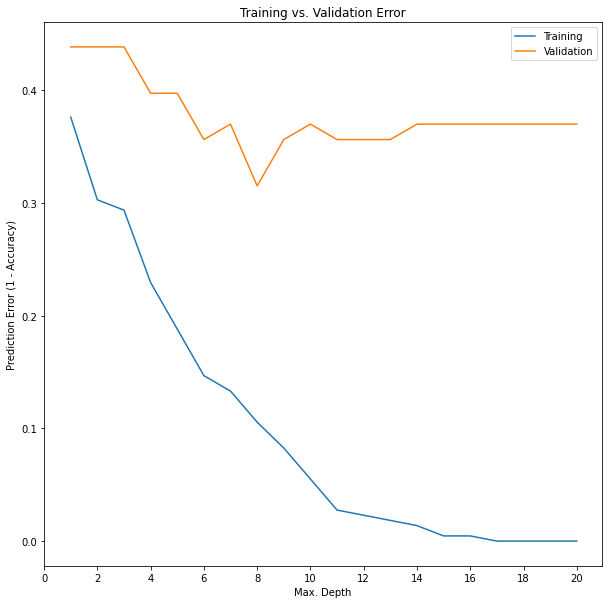

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
model = DecisionTreeClassifier(max_depth=20,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

1.0

In [ ]:
model.score(x_val,val_target)

0.6301369863013698

`max_leaf_nodes`

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=70,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

1.0

In [ ]:
model.score(x_val,val_target)

0.6575342465753424

In [ ]:
def max_leaf_error(md):
    model = DecisionTreeClassifier(max_leaf_nodes=md, random_state=42)
    model.fit(x_train, train_target)
    train_acc = 1 - model.score(x_train, train_target)
    val_acc = 1 - model.score(x_val, val_target)
    return {'Max leaf nodes': md, 'Training Error': train_acc, 'Validation Error': val_acc}

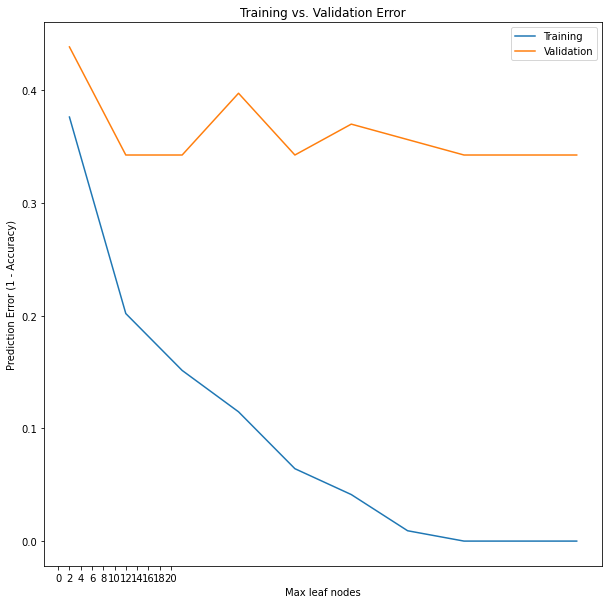

In [ ]:
errors_df = pd.DataFrame([max_leaf_error(md) for md in range(2,100,10)])
plt.figure()
plt.plot(errors_df['Max leaf nodes'], errors_df['Training Error'])
plt.plot(errors_df['Max leaf nodes'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max leaf nodes')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
model = DecisionTreeClassifier(max_depth=20,max_leaf_nodes=70,random_state=42).fit(x_train,train_target)
model.score(x_train,train_target)

1.0

In [ ]:
model.predict(x_val)

array(['bad', 'good', 'good', 'good', 'good', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'bad', 'bad',
       'good', 'bad', 'good', 'bad', 'good', 'good', 'bad', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad',
       'bad', 'bad', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good'], dtype=object)